## 1. 데이터 불러오기

In [248]:
import numpy as np
import pandas as pd

In [249]:
data = pd.read_csv('train.csv')
data.tail(5)

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
1454,2174,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,21.0
1455,2175,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,20.0
1456,2176,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0,22.0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0
1458,2179,17,21.1,0.0,3.1,47.0,1973.0,0.046,38.0,17.0,170.0


- id : 고유 id
- hour : 시간
- temperture : 1시간 전 기온
- precipitation : 1시간 전 비가 내리면 1, 내리지 않으면 0
- windspeed : 1시간 전 풍속(평균)
- humidity : 1시간 전 습도
- visibility : 1시간 전 시정/시계, 현재 기상 상황에서의 가시성
- ozone : 1시간 전 오존 농도
- pm10 : 1시간 전 미세먼지 농도
- pm2.5 : 1시간 전 초미세먼지 농도
- count : 시간에 따른 따릉이 대여 수 (target)

## 2. 데이터 확인하기

In [250]:
import matplotlib.pyplot as plt
import seaborn as sns

In [251]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [252]:
data.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [253]:
data = data.fillna(method='ffill')

In [254]:
data.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,1105.914325,11.493489,16.715559,0.031528,2.481151,52.269363,1404.168609,0.039367,57.519534,30.605209,108.563400
std,631.338681,6.922790,5.238278,0.174801,1.376356,20.382877,583.432405,0.019479,31.891730,15.142410,82.631733
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,877.500000,0.026000,36.000000,20.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1576.000000,0.039000,51.000000,26.000000,96.000000
75%,1651.000000,17.500000,20.050000,0.000000,3.400000,69.000000,1994.000000,0.052000,70.000000,37.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


In [255]:
data['hour'].value_counts()

20    61
4     61
5     61
11    61
22    61
19    61
15    61
7     61
8     61
10    61
1     61
14    61
9     61
3     61
2     61
18    61
23    61
6     61
12    61
13    60
17    60
16    60
0     60
21    60
Name: hour, dtype: int64

In [256]:
data.isnull().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
count                     0
dtype: int64

<AxesSubplot:xlabel='hour', ylabel='count'>

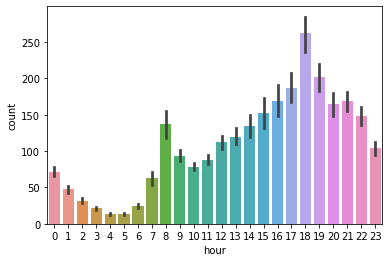

In [257]:
sns.barplot(x='hour', y='count', data=data)

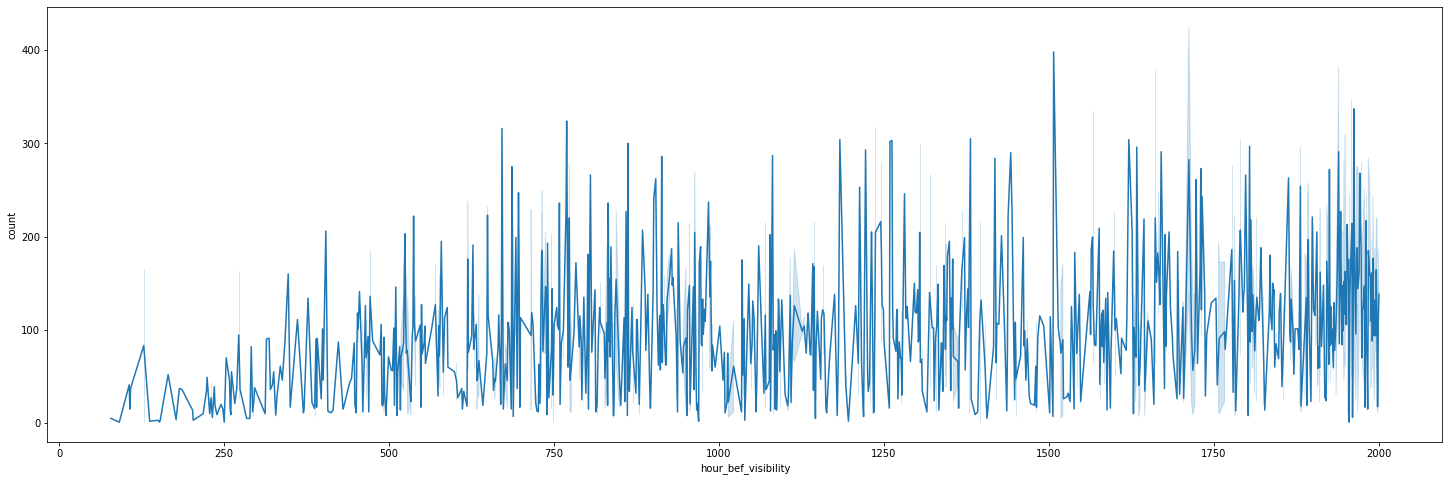

In [258]:
plt.figure(figsize=(25, 8))
sns.lineplot(x='hour_bef_visibility', y='count', data=data)
plt.show()

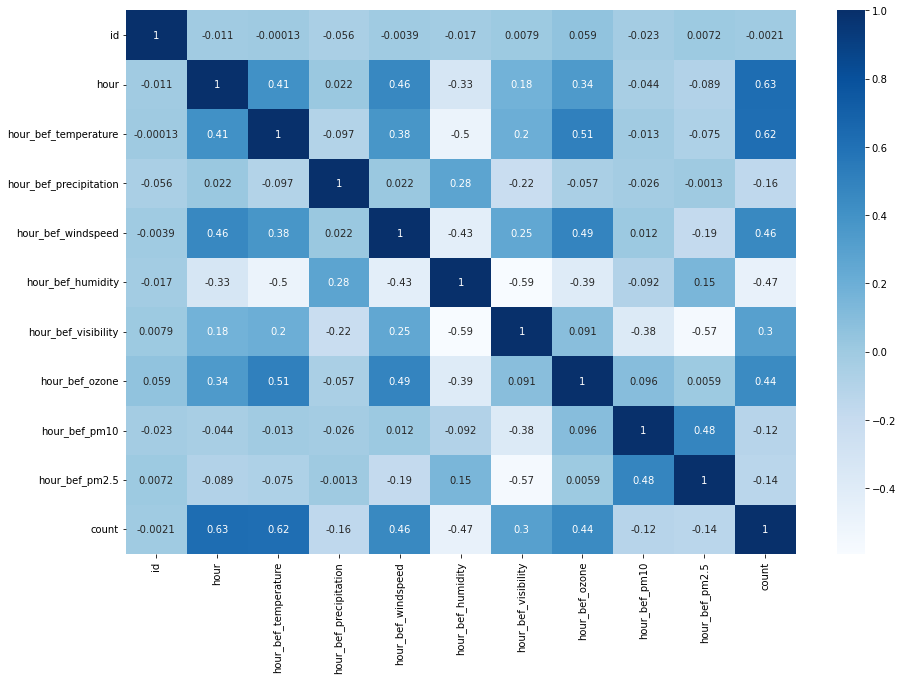

In [259]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), cmap='Blues', annot=True)
plt.show()

## 3. train / validation 나누기

In [260]:
from sklearn.model_selection import train_test_split

In [261]:
# del_col = ['hour_bef_pm2.5', 'hour_bef_pm10', 'hour_bef_visibility', 'hour_bef_precipitation', 'count']
X = data.drop(['count'], axis=1)
Y = data['count']

In [262]:
X.shape, Y.shape

((1459, 10), (1459,))

In [263]:
x_train, x_val, y_train, y_val = train_test_split(X, Y, train_size = 0.8, random_state=42)

## 4. 모델 학습하기

In [264]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

from sklearn.metrics import mean_squared_error

In [265]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr_y_pred = lr.predict(x_val)
print('LinearRegression RMSE:', mean_squared_error(y_val, lr_y_pred) ** 0.5)

LinearRegression RMSE: 52.77826295600676


In [266]:
rf = RandomForestRegressor(random_state=42, n_estimators=4000)

In [267]:
rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=4000, random_state=42)

In [268]:
rf_y_pred = rf.predict(x_val)

In [269]:
print('RandomForest RMSE:', mean_squared_error(y_val, rf_y_pred) ** 0.5)

RandomForest RMSE: 38.742299273850726


In [270]:
xg = XGBRegressor()
xg.fit(x_train, y_train)
xg_y_pred = xg.predict(x_val)
print('XGBoost RMSE:', mean_squared_error(y_val, xg_y_pred) ** 0.5)

XGBoost RMSE: 39.82234053205457


In [271]:
es = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, restore_best_weights=True)

In [276]:
keras.backend.clear_session()

model = keras.models.Sequential()

model.add(Input(shape=(10,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam')

In [277]:
model.fit(x_train, y_train, epochs=1000, verbose=1, callbacks=[es], validation_split=0.2)

Epoch 1/1000
30/30 [==============================] - 1s 16ms/step - loss: 8561.6514 - val_loss: 6096.3140
Epoch 2/1000
30/30 [==============================] - 0s 3ms/step - loss: 6399.6436 - val_loss: 5845.1616
Epoch 3/1000
30/30 [==============================] - 0s 3ms/step - loss: 6303.2090 - val_loss: 5750.3628
Epoch 4/1000
30/30 [==============================] - 0s 3ms/step - loss: 6387.4624 - val_loss: 5981.6323
Epoch 5/1000
30/30 [==============================] - 0s 3ms/step - loss: 6341.8945 - val_loss: 5825.5078
Epoch 6/1000
30/30 [==============================] - 0s 2ms/step - loss: 6091.5337 - val_loss: 5442.8354
Epoch 7/1000
30/30 [==============================] - 0s 3ms/step - loss: 6035.2876 - val_loss: 5147.9136
Epoch 8/1000
30/30 [==============================] - 0s 3ms/step - loss: 5642.0386 - val_loss: 5257.9678
Epoch 9/1000
30/30 [==============================] - 0s 2ms/step - loss: 5318.5640 - val_loss: 5545.8262
Epoch 10/1000
30/30 [========================

In [278]:
dl_y_pred = model.predict(x_val)
print('Deeplearnig RMSE:', mean_squared_error(y_val, dl_y_pred) ** 0.5)

10/10 [==============================] - 0s 1ms/step
Deeplearnig RMSE: 57.42360255477561


## 5. submission 만들기

In [275]:
test_data = pd.read_csv('test.csv')

In [212]:
test_data = test_data.fillna(method='ffill')
test_data.isnull().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
dtype: int64

In [213]:
result = rf.predict(test_data)

In [214]:
submission = pd.read_csv('submission.csv')
submission

,id,count
0,0,NaN
1,1,NaN
2,2,NaN
3,4,NaN
4,5,NaN
...,...,...
710,2148,NaN
711,2149,NaN
712,2165,NaN
713,2166,NaN


In [215]:
submission['count'] = result
submission

,id,count
0,0,97.8920
1,1,249.4800
2,2,89.7235
3,4,30.4345
4,5,70.4360
...,...,...
710,2148,52.0290
711,2149,60.4895
712,2165,118.6155
713,2166,145.3995


In [216]:
submission.to_csv('result3.csv', index=False)